In [176]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [177]:
# read data
train_data_df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [178]:
# check data
train_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [179]:
# check shape
train_data_df.shape

(891, 12)

In [180]:
# check for null values
train_data_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [181]:
train_data_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load the Titanic dataset
df = pd.read_csv('/kaggle/input/titanic/train.csv')

# Perform feature engineering and preprocessing
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')
df['CabinDeck'] = df['Cabin'].str[0]
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 30, 50, float('inf')], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
df['FarePerPerson'] = df['Fare'] / (df['SibSp'] + df['Parch'] + 1)
df['TicketPrefix'] = df['Ticket'].str.split().str[0].str.replace(".", "").str.replace("/", "").str.upper()

# Select relevant features and target variable
features = ['Pclass', 'Sex', 'AgeGroup', 'FarePerPerson', 'Embarked', 'Title', 'CabinDeck', 'TicketPrefix']
target = 'Survived'
X = df[features]
y = df[target]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform standard scaling on numeric features
numeric_features = ['Pclass', 'FarePerPerson']
numeric_transformer = StandardScaler()
X_train[numeric_features] = numeric_transformer.fit_transform(X_train[numeric_features])
X_test[numeric_features] = numeric_transformer.transform(X_test[numeric_features])



# Make predictions using the best model on unseen data

# Continue with further steps as required


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  from ipykernel import kernelapp as app


In [39]:
# Perform one-hot encoding on categorical features
categorical_features = ['Sex', 'AgeGroup', 'Embarked', 'Title', 'CabinDeck', 'TicketPrefix']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
# X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
# X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)


# Combine the training and testing data
combined_data = pd.concat([X_train, X_test])

# Apply one-hot encoding on combined data
combined_data_encoded = pd.get_dummies(combined_data, columns=categorical_features, drop_first=True)

# Split the combined data back into training and testing sets
X_train_encoded = combined_data_encoded[:len(X_train)]
X_test_encoded = combined_data_encoded[len(X_train):]



In [42]:
# Define the model
model = RandomForestClassifier()

# Define hyperparameters to tune
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search to find the best model
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train_encoded, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [43]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test_encoded, y_test)
print("Best Model Accuracy:", accuracy)

Best Model Accuracy: 0.8324022346368715


In [44]:
# Load the unseen data
unseen_data = pd.read_csv('/kaggle/input/titanic/test.csv')  # Replace with the filename or path of your unseen data

# Perform the same preprocessing steps on the unseen data
unseen_data['Title'] = unseen_data['Name'].str.extract(' ([A-Za-z]+)\.')
unseen_data['CabinDeck'] = unseen_data['Cabin'].str[0]
unseen_data['AgeGroup'] = pd.cut(unseen_data['Age'], bins=[0, 12, 18, 30, 50, float('inf')], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
unseen_data['FarePerPerson'] = unseen_data['Fare'] / (unseen_data['SibSp'] + unseen_data['Parch'] + 1)
unseen_data['TicketPrefix'] = unseen_data['Ticket'].str.split().str[0].str.replace(".", "").str.replace("/", "").str.upper()



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == "__main__":


In [45]:
# Perform standard scaling on numeric features
numeric_features = ['Pclass', 'FarePerPerson']
numeric_transformer = StandardScaler()
unseen_data[numeric_features] = numeric_transformer.transform(unseen_data[numeric_features])

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [22]:
# Make predictions on the preprocessed unseen data using the best model from grid search
predictions = grid_search.predict(X_unseen_processed)

# Display the predictions
print(predictions)

ValueError: X has 490 features, but ColumnTransformer is expecting 8 features as input.

In [182]:
# train_data_df['Family_size'] = train_data_df['SibSp'] + train_data_df['Parch']

In [183]:
train_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [184]:
train_data_df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [185]:
# check correlation
train_data_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [186]:
# check data types
train_data_df.dtypes == int

PassengerId     True
Survived        True
Pclass          True
Name           False
Sex            False
Age            False
SibSp           True
Parch           True
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [187]:
numeric_variables = train_data_df.select_dtypes(include=['int', 'float']).columns
numeric_variables

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

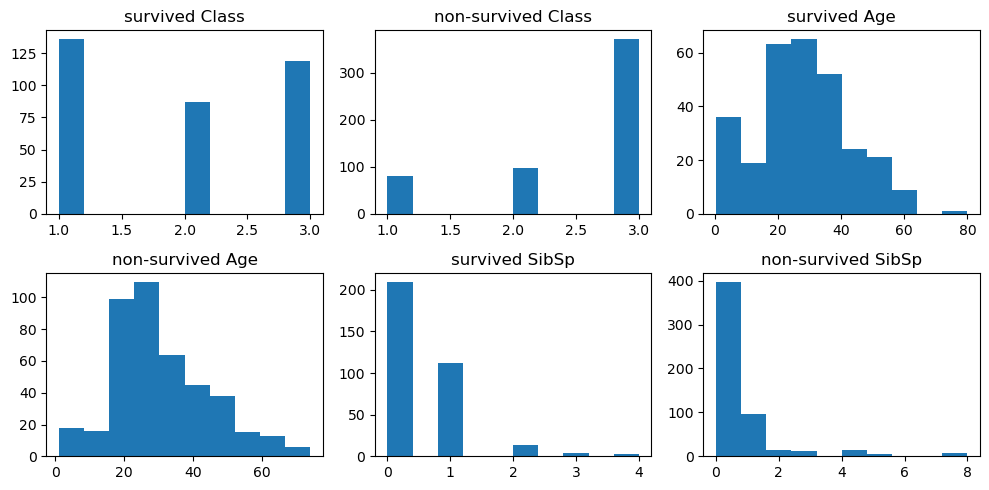

In [188]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

axes[0][0].hist(train_data_df[train_data_df.Survived == 1]['Pclass'])
axes[0][0].set_title('survived Class')

axes[0][1].hist(train_data_df[train_data_df.Survived != 1]['Pclass'])
axes[0][1].set_title('non-survived Class')

axes[0][2].hist(train_data_df[train_data_df.Survived == 1]['Age'])
axes[0][2].set_title('survived Age')

axes[1][0].hist(train_data_df[train_data_df.Survived != 1]['Age'])
axes[1][0].set_title('non-survived Age')

axes[1][1].hist(train_data_df[train_data_df.Survived == 1]['SibSp'])
axes[1][1].set_title('survived SibSp')

axes[1][2].hist(train_data_df[train_data_df.Survived != 1]['SibSp'])
axes[1][2].set_title('non-survived SibSp')

plt.tight_layout()
plt.show()

In [189]:
# impute age with median
train_data_df['Age'].fillna(train_data_df['Age'].median(),inplace=True)

In [190]:
# check for null values
train_data_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [191]:
# check cabin
train_data_df['Cabin'].value_counts().sort_values(ascending=False)

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
F33            3
              ..
D6             1
B82 B84        1
A36            1
B69            1
C148           1
Name: Cabin, Length: 147, dtype: int64

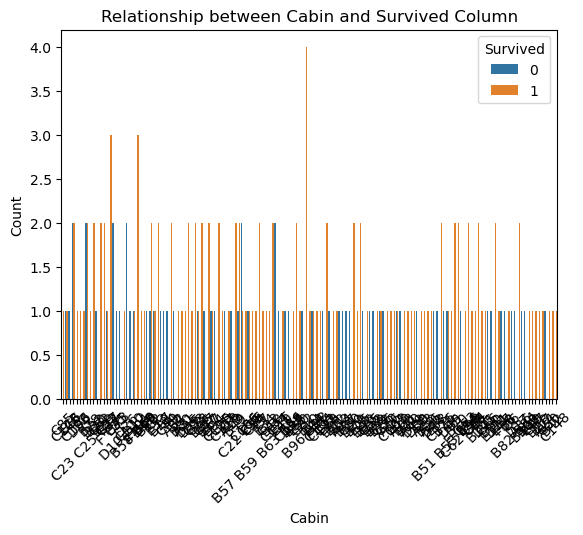

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'categorical_column' and 'boolean_column'

# Create a count plot
sns.countplot(x='Cabin', hue='Survived', data=train_data_df)

# Add labels and title
plt.xlabel('Cabin')
plt.ylabel('Count')
plt.title('Relationship between Cabin and Survived Column')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [193]:
# drop cabin column
train_data_df.drop('Cabin',axis=1,inplace=True)

In [194]:
# drop name column, ticket column
train_data_df.drop(["Name","Ticket"],axis=1,inplace=True)

In [195]:
# drop passenger id
train_data_df.drop(["PassengerId"],axis=1,inplace=True)

In [196]:
# check sex column
train_data_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [197]:
# check df
train_data_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [198]:
# convert age as int
train_data_df['Age'] = train_data_df['Age'].astype(int)

In [199]:
# check embarked column
train_data_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [200]:
# one hot encode Embarked column and drop it from the original df
encoded_df = pd.get_dummies(train_data_df['Embarked'], prefix='Embarked')
df_encoded = pd.concat([train_data_df, encoded_df], axis=1)
df_encoded = df_encoded.drop('Embarked', axis=1)

In [201]:
# one hot encode Class column and drop it from the original df
encoded_df = pd.get_dummies(df_encoded['Pclass'], prefix='Pclass')
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded = df_encoded.drop('Pclass', axis=1)

In [202]:
# one hot encode Sex column and drop it from the original df
encoded_df = pd.get_dummies(df_encoded['Sex'], prefix='Sex')
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded = df_encoded.drop('Sex', axis=1)

In [203]:
df_encoded.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35,1,0,53.1000,0,0,1,1,0,0,1,0
4,0,35,0,0,8.0500,0,0,1,0,0,1,0,1


In [204]:
# Splitting the data into features and target variable
X = df_encoded.drop('Survived', axis=1)  # Features
y = df_encoded['Survived']  # Target variable

In [205]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import OneHotEncoder

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a Random Forest classifier
# rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
# rf_classifier = AdaBoostClassifier(base_estimator=rf_classifier, n_estimators=100, random_state=42)

# # Train the classifier
# rf_classifier.fit(X_train, y_train)

# # Make predictions on the testing set
# y_pred = rf_classifier.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')

Accuracy: 0.8100558659217877


In [206]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7821229050279329


In [207]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [209]:
import tensorflow as tf

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Activation('relu'),  # Apply activation function after batch normalization
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [210]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [211]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
23/23 [==============================] - 3s 19ms/step - loss: 0.5387 - accuracy: 0.7528 - val_loss: 0.6370 - val_accuracy: 0.7374
Epoch 2/20
23/23 [==============================] - 0s 6ms/step - loss: 0.4377 - accuracy: 0.8216 - val_loss: 0.6016 - val_accuracy: 0.7765
Epoch 3/20
23/23 [==============================] - 0s 8ms/step - loss: 0.4096 - accuracy: 0.8301 - val_loss: 0.5730 - val_accuracy: 0.7933
Epoch 4/20
23/23 [==============================] - 0s 6ms/step - loss: 0.4083 - accuracy: 0.8216 - val_loss: 0.5372 - val_accuracy: 0.7821
Epoch 5/20
23/23 [==============================] - 0s 6ms/step - loss: 0.4151 - accuracy: 0.8329 - val_loss: 0.4977 - val_accuracy: 0.7877
Epoch 6/20
23/23 [==============================] - 0s 6ms/step - loss: 0.4226 - accuracy: 0.8188 - val_loss: 0.4894 - val_accuracy: 0.7765
Epoch 7/20
23/23 [==============================] - 0s 6ms/step - loss: 0.3907 - accuracy: 0.8216 - val_loss: 0.4589 - val_accuracy: 0.7933
Epoch 8/20
23/23 [=

In [212]:
# predict the test data with new model
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [213]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [214]:
# applying the same pre-processing steps
# impute age with median
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)

# drop cabin column
test_df.drop('Cabin',axis=1,inplace=True)

# drop name column, ticket column
test_df.drop(["Name","Ticket"],axis=1,inplace=True)

# drop PassengerId
test_df.drop(["PassengerId"],axis=1,inplace=True)


# make male = 1, female = 0
# test_df['Sex'] = test_df['Sex'].map({'male': 1, 'female': 0})

# convert age as int
test_df['Age'] = test_df['Age'].astype(int)

# fill null values with 0
test_df['Fare'].fillna(0, inplace=True)

# one hot encode Embarked column and drop it from the original df
encoded_df = pd.get_dummies(test_df['Embarked'], prefix='Embarked')
df_encoded = pd.concat([test_df, encoded_df], axis=1)
df_encoded = df_encoded.drop('Embarked', axis=1)

# one hot encode Class column and drop it from the original df
encoded_df = pd.get_dummies(df_encoded['Pclass'], prefix='Pclass')
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded = df_encoded.drop('Pclass', axis=1)

# one hot encode Sex column and drop it from the original df
encoded_df = pd.get_dummies(df_encoded['Sex'], prefix='Sex')
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
df_encoded = df_encoded.drop('Sex', axis=1)

df_encoded_transformed = scaler.transform(df_encoded)

In [215]:
df_encoded_transformed

array([[ 0.36996802, -0.47072241, -0.47934164, ...,  0.8882256 ,
        -0.7243102 ,  0.7243102 ],
       [ 1.36950801,  0.37992316, -0.47934164, ...,  0.8882256 ,
         1.38062393, -1.38062393],
       [ 2.52282338, -0.47072241, -0.47934164, ..., -1.1258401 ,
        -0.7243102 ,  0.7243102 ],
       ...,
       [ 0.67751879, -0.47072241, -0.47934164, ...,  0.8882256 ,
        -0.7243102 ,  0.7243102 ],
       [-0.16824582, -0.47072241, -0.47934164, ...,  0.8882256 ,
        -0.7243102 ,  0.7243102 ],
       [-0.16824582,  0.37992316,  0.78470001, ...,  0.8882256 ,
        -0.7243102 ,  0.7243102 ]])

In [216]:
y_pred = model.predict(df_encoded_transformed)

14/14 [==============================] - 0s 2ms/step


In [217]:
y_pred.shape

(418, 1)

In [218]:
threshold = 0.5
y_pred_classes = (y_pred > threshold).astype(int)

In [219]:
y_pred_classes.shape

(418, 1)

In [220]:
# predict the test data with new model
test_df2 = pd.read_csv('/kaggle/input/titanic/test.csv')

In [221]:
final_df = pd.DataFrame()

In [222]:
final_df['PassengerId'] = test_df2.PassengerId
final_df['Survived'] = y_pred_classes

In [223]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [224]:
# write to csv file
final_df.to_csv('submission.csv', index=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Create a logistic regression model
# lr_model = LogisticRegression()
lr_model = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [226]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

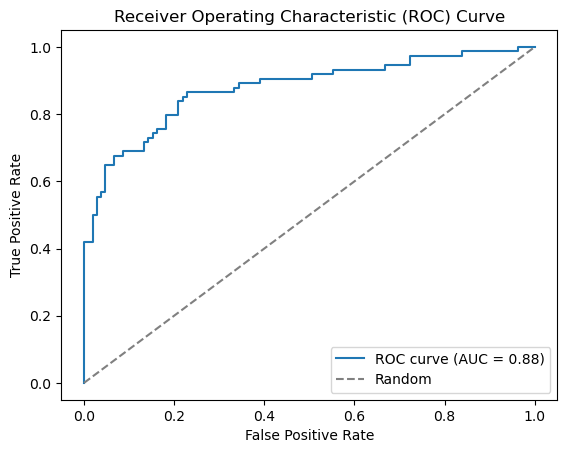

In [227]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_pred_probs = lr_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_probs)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [228]:
# Predict on the unseen test set
y_pred = lr_model.predict(df_encoded_transformed)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [229]:
final_df['PassengerId'] = test_df2.PassengerId
final_df['Survived'] = y_pred

In [230]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [231]:
# write to csv file
# final_df.to_csv('submission.csv', index=False)

In [232]:
# Make predictions on the testing set
y_pred = rf_classifier.predict(df_encoded)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [233]:
# final_df['PassengerId'] = test_df2.PassengerId
# final_df['Survived'] = y_pred
# final_df.to_csv('submission.csv', index=False)